# Jugando con TensorFlow Playground


# Motivación

Imaginemos que tenemos frutas de color amarillo y azul.

## <img src="frutas1.png" width="200" height="150">

Queremos que un sistema automatico "robot" separe dos tipos de elementos por ejemplo frutas distinguiendolas por color.

<img src="EsquemaClasificador.png" width="600" height="200">

Como podemos lograr esto? Supongamos que las frutas se encuentran flotando en una piscina de agua clara. Podriamos aplicar colorante amarillo o azul desde un borde de la piscina y dejar que este se esparsa, justo antes de mezclarse tendriamos dos regiones de diferente color. En la herramienta de tensorflow, podemos jugar con distintas configuraciones, en donde los puntos amarillos y azules representaran las frutas de este color.

<img src="piscina1.png" width="800" height="200">

El objetivo sera que el color del agua de la piscina coincida correctamente con el color de las frutas. Eso lo podemos conseguir probando distintas configuraciones. El fondo de la piscina sera representado por el fondo sobre el que estan los puntos en la herramienta tensorflow.

<img src="clasificacion.png" width="300" height="300">

# Tensorflow Playground

Tensorflow playground es una herramienta interactiva que nos permite jugar con distintas configuraciones de entrada tanto del "robot" que sera en realidad una red neuronal representada por los cuadrados de colores. Así como con la forma en que aprende esta red neuronal, determinada por los parametros de entrenamiento.

<img src="tf_pgd.png" width="800" height="600">

Por último en la parte derecha podemos apreciar que tan bien hecha fue la clasificación, observando que tan prequeño es el "Test Loss" así como también observando si el color del fondo coincide con los puntos que estan encima. 

# Funcionamiento de la herramienta

In [2]:
import matplotlib.pyplot as plt
import numpy as np

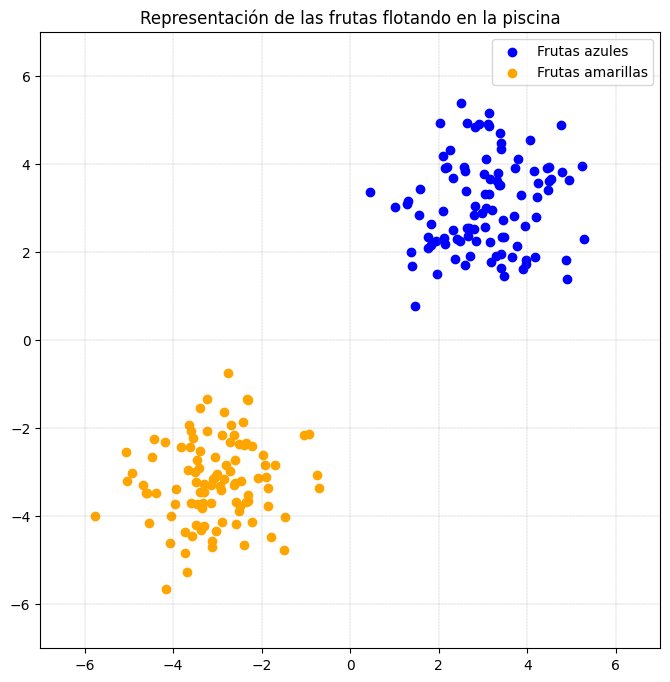

In [3]:
# Generar dos conjuntos de puntos aleatorios
np.random.seed(0)  # Para reproducibilidad
num_points = 100

# Generar puntos en el primer cuadrante
x1 = np.random.normal(loc=3, scale=1.0, size=num_points) #Noise
y1 = np.random.normal(loc=3, scale=1.0, size=num_points)

# Generar puntos en el tercer cuadrante
x2 = np.random.normal(loc=-3, scale=1.0, size=num_points)
y2 = np.random.normal(loc=-3, scale=1.0, size=num_points)

# Crear la gráfica
plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, label='Frutas azules', color='blue')
plt.scatter(x2, y2, label='Frutas amarillas', color='orange')

# Configurar ejes y etiquetas
plt.xlim(-7, 7)
plt.ylim(-7, 7)

# Agregar una leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.title('Representación de las frutas flotando en la piscina')
plt.show()

In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

## Parametros de la red neuronal

In [7]:
qlearning_rate = 0.03 # Tasa de aprendizaje "Que tan rápido aprende el modelo"
activation_function = "tanh" #Función de activación 
regularization_rate = 0 #Tasa de regularización 
regularizer = None #Tipo de regularizador
training_ratio = 0.5 #Porcentaje de los datos destinados a entrenamiento
batch_size = 10 #Numero de datos pasados al módelo en cada actualización
max_epochs = 100 #Número máximo de epocas de entrenamiento

In [8]:
x_data = np.concatenate((x1, x2))
y_data = np.concatenate((y1, y2))
labels = np.concatenate((np.ones(num_points), np.zeros(num_points)))  # Etiquetas 1 para el primer conjunto, 0 para el segundo
data = np.column_stack((x_data, y_data))

# Dividir los datos en conjuntos de entrenamiento y prueba
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=training_ratio, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Capa de entrada con dos características (x, y)
    tf.keras.layers.Dense(2, activation=activation_function, kernel_regularizer=regularizer)  # Dos neuronas en la capa de salida con activación softmax
])

# Crear un optimizador Adam con el learning rate personalizado
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(data_train, labels_train, epochs=max_epochs, batch_size=batch_size,  verbose=1)
test_loss, test_accuracy = model.evaluate(data_test, labels_test)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 4.0864 - accuracy: 1.0000
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.9875
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9563
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 0.9375
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.9250
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.9187
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9250
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.9250
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.9312
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.9312
Epoch 11/

16/16 [==============================] - 0s 1ms/step - loss: 2.8407e-04 - accuracy: 0.9187
Epoch 81/100
16/16 [==============================] - 0s 1000us/step - loss: 2.7891e-04 - accuracy: 0.9187
Epoch 82/100
16/16 [==============================] - 0s 1ms/step - loss: 2.7486e-04 - accuracy: 0.9187
Epoch 83/100
16/16 [==============================] - 0s 1000us/step - loss: 2.6876e-04 - accuracy: 0.9187
Epoch 84/100
16/16 [==============================] - 0s 1ms/step - loss: 2.6407e-04 - accuracy: 0.9187
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 2.5954e-04 - accuracy: 0.9187
Epoch 86/100
16/16 [==============================] - 0s 998us/step - loss: 2.5502e-04 - accuracy: 0.9125
Epoch 87/100
16/16 [==============================] - 0s 1000us/step - loss: 2.5048e-04 - accuracy: 0.9125
Epoch 88/100
16/16 [==============================] - 0s 1000us/step - loss: 2.4685e-04 - accuracy: 0.9125
Epoch 89/100
16/16 [==============================] - 0s 1ms/st

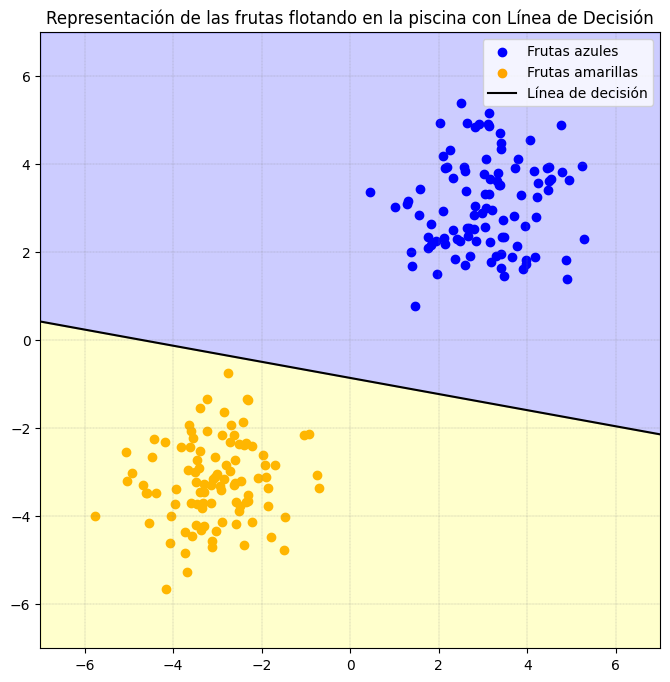

In [18]:
weights, bias = model.layers[0].get_weights()

# Definir la función de la línea de decisión
def decision_line(x):
    result = np.zeros((len(x),2))
    for i in range(len(x)): 
        result[i] = (-bias - weights[0]*x[i]) / weights[1]
    return result

# Crear una gráfica para visualizar los puntos y la línea de decisión
plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, label='Frutas azules', color='blue')
plt.scatter(x2, y2, label='Frutas amarillas', color='orange')

# Dibujar la línea de decisión
x_decision = np.linspace(-7, 7, 100)
y_decision = decision_line(x_decision)
plt.plot(x_decision, y_decision[:,1], label='Línea de decisión', color='black')

plt.fill_between(x_decision, -7, y_decision[:, 1], where=(y_decision[:, 1] > -7), color='yellow', alpha=0.2)

# Rellenar el área por encima de la línea con fondo azul (más tenue)
plt.fill_between(x_decision, 7, y_decision[:, 1], where=(y_decision[:, 1] < 7), color='blue', alpha=0.2)

# Configurar ejes y etiquetas
plt.xlim(-7, 7)
plt.ylim(-7, 7)

# Agregar una leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(color='gray', linestyle='--', linewidth=0.2)
plt.title('Representación de las frutas flotando en la piscina con Línea de Decisión')
plt.show()